<a href="https://colab.research.google.com/github/tigerjk726/Bumjoong/blob/main/Typhoon_Phase6_ANN(new_data_2023_06_12)_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from statistics import mean
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
cv = LeaveOneOut()
import os
import pandas as pd
import datetime
from google.colab import drive
import os
import pandas as pd
import pickle
import numpy as np

drive.mount('/content/drive')

%cd /content/drive/My Drive/8.Colab Notebooks/2023.05.07 Final Prediction/

Mounted at /content/drive
/content/drive/My Drive/8.Colab Notebooks/2023.05.07 Final Prediction


In [ ]:
import os

directory = 'monthly/AAO/CMIP6_cdr'
filelist = []

for filename in os.listdir(directory):
    # Check if the file has a .txt extension
    if filename.endswith('.txt'):
        # filename_without_extension = os.path.splitext(filename)[0]
        # Get the substring after the first '_'
        filename_without_extension = filename.split('_', 1)[1]
        # Print the file name without the extension
        filelist.append(filename_without_extension)

filelist


['CESM2_1pctCO2-cdr.txt',
 'CESM2_piControl.txt',
 'NorESM2-LM_piControl.txt',
 'NorESM2-LM_1pctCO2-cdr.txt',
 'UKESM1-0-LL_NIMS_piControl.txt',
 'UKESM1-0-LL_NIMS_1pctCO2-D-1pctCO2_r2.txt',
 'UKESM1-0-LL_NIMS_1pctCO2-D-1pctCO2_r1.txt',
 'UKESM1-0-LL_NIMS_1pctCO2-D-1pctCO2_r3.txt',
 'UKESM1-0-LL_NIMS_1pctCO2-D-2pctCO2_r1.txt',
 'UKESM1-0-LL_NIMS_1pctCO2-D-2pctCO2_r2.txt',
 'UKESM1-0-LL_NIMS_1pctCO2-D-2pctCO2_r3.txt',
 'UKESM1-0-LL_NIMS_1pctCO2-A-1pctCO2_r1.txt',
 'UKESM1-0-LL_NIMS_1pctCO2-A-1pctCO2_r2.txt',
 'UKESM1-0-LL_NIMS_1pctCO2-A-1pctCO2_r3.txt',
 'UKESM1-0-LL_NIMS_1pctCO2-A-2pctCO2_r2.txt',
 'UKESM1-0-LL_NIMS_1pctCO2-A-2pctCO2_r1.txt',
 'UKESM1-0-LL_NIMS_1pctCO2-A-2pctCO2_r3.txt',
 'UKESM1-0-LL_NIMS_1pctCO2-C-1pctCO2_r2.txt',
 'UKESM1-0-LL_NIMS_1pctCO2-C-1pctCO2_r1.txt',
 'UKESM1-0-LL_NIMS_1pctCO2-C-1pctCO2_r3.txt',
 'UKESM1-0-LL_NIMS_1pctCO2-C-2pctCO2_r2.txt',
 'UKESM1-0-LL_NIMS_1pctCO2-C-2pctCO2_r1.txt',
 'UKESM1-0-LL_NIMS_1pctCO2-B-1pctCO2_r1.txt',
 'UKESM1-0-LL_NIMS_1pctCO2-

In [ ]:
filelist = ['NorESM2-LM_1pctCO2-cdr.txt',
 'CESM2_1pctCO2-cdr.txt',
 'UKESM1-0-LL_NIMS_1pctCO2-D-2pctCO2_r1.txt',
 'UKESM1-0-LL_NIMS_1pctCO2-D-1pctCO2_r2.txt',
 'UKESM1-0-LL_NIMS_piControl.txt',
 'NorESM2-LM_piControl.txt',
 'UKESM1-0-LL_NIMS_1pctCO2-D-2pctCO2_r2.txt',
 'UKESM1-0-LL_NIMS_1pctCO2-C-2pctCO2_r1.txt',
 'UKESM1-0-LL_NIMS_1pctCO2-A-1pctCO2_r2.txt',
 'UKESM1-0-LL_NIMS_1pctCO2-D-1pctCO2_r1.txt',
 'UKESM1-0-LL_NIMS_1pctCO2-A-1pctCO2_r1.txt',
 'UKESM1-0-LL_NIMS_1pctCO2-A-2pctCO2_r3.txt',
 'UKESM1-0-LL_NIMS_1pctCO2-C-1pctCO2_r3.txt',
 'UKESM1-0-LL_NIMS_1pctCO2-C-1pctCO2_r2.txt',
 'CESM2_piControl.txt',
 'UKESM1-0-LL_NIMS_1pctCO2-D-2pctCO2_r3.txt',
 'UKESM1-0-LL_NIMS_1pctCO2-C-1pctCO2_r1.txt',
 'UKESM1-0-LL_NIMS_1pctCO2-A-1pctCO2_r3.txt',
 'UKESM1-0-LL_NIMS_1pctCO2-A-2pctCO2_r1.txt',
 'UKESM1-0-LL_NIMS_1pctCO2-A-2pctCO2_r2.txt',
 'UKESM1-0-LL_NIMS_1pctCO2-B-1pctCO2_r1.txt',
 'UKESM1-0-LL_NIMS_1pctCO2-D-1pctCO2_r3.txt',
 'UKESM1-0-LL_NIMS_1pctCO2-C-2pctCO2_r3.txt',
 'UKESM1-0-LL_NIMS_1pctCO2-B-2pctCO2_r1.txt',
 'UKESM1-0-LL_NIMS_1pctCO2-C-2pctCO2_r2.txt',
 'UKESM1-0-LL_NIMS_1pctCO2-B-1pctCO2_r3.txt',
 'UKESM1-0-LL_NIMS_1pctCO2-B-2pctCO2_r2.txt',
 'UKESM1-0-LL_NIMS_1pctCO2-B-1pctCO2_r2.txt',
 'UKESM1-0-LL_NIMS_1pctCO2-B-2pctCO2_r3.txt']


In [ ]:
# Loop through all the subdirectories
%cd /content/drive/My Drive/8.Colab Notebooks/2023.05.07 Final Prediction/

for x in filelist:

  directory = "monthly"

  df_list = []

  for subdir in os.listdir(directory):
      subdir_path = os.path.join(directory, subdir)
      if os.path.isdir(subdir_path):
          for foldername in os.listdir(subdir_path):
              if foldername == 'CMIP6_cdr':
                  filepath = os.path.join(subdir_path, foldername)
                  # Loop through all CSV files in the directory
                  for filename in os.listdir(filepath):
                      if filename.endswith(x):
                          filepath = os.path.join(filepath, filename)
                          with open(filepath) as f:
                              lines = [line.split() for line in f]
                          data = []
                          for line in lines:
                              year = int(line[0])
                              values = [float(y) for y in line[1:]]
                              row_dict = {'year': year}
                              for i, value in enumerate(values):
                                  month = i + 1
                                  month_name = pd.Timestamp(year=2000, month=month, day=1).strftime('%B').lower()
                                  month_name = datetime.datetime.strptime(month_name, "%B").month
                                  row_dict[month_name] = value
                              data.append(row_dict)
                        # create the DataFrame
                          df = pd.DataFrame(data)
                          df = df.melt(id_vars=['year'], var_name='month', value_name=filename.replace('.txt', ''))
                          df = df.sort_values(['year', 'month'])
                          column_name = filename.replace('.txt', '')
                          df_list.append(df)


  # Concatenate all DataFrames in the list into a single DataFrame
  rawdata_df = pd.concat(df_list, ignore_index=True)

  # Group by year and month and aggregate values
  rawdata_df = rawdata_df.groupby(['year', 'month']).mean().reset_index()

  # Define the country codes dictionary
  country_codes = {
      'australia': 0,
      'bangla': 1,
      'caribbean': 2,
      'china': 3,
      'india': 4,
      'japan': 5,
      'korea': 6,
      'madagascar': 7,
      'mexic2': 8,
      'mexico': 9,
      'myanmar': 10,
      'phili': 11,
      'pakistan': 12,
      'sri': 13,
      'taiwan': 14,
      'u2': 15,
      'us': 16,
      'vietnam': 17,
  }

  result_dfs = []

  # Loop through each key-value pair in the country codes dictionary
  for key, value in country_codes.items():
      # Make a copy of the rawdata_df for each country
      country_df = rawdata_df.copy()

      # Set the country and name columns in the country_df
      country_df['country'] = value
      country_df['name'] = key

      # Append the country_df to the result_dfs list
      result_dfs.append(country_df)

  # Concatenate all dataframes in the result_dfs list into a single dataframe
  alldfs = pd.concat(result_dfs, ignore_index=True)

  # one-hot encoding using pandas.get_dummies() method
  one_hot = pd.get_dummies(alldfs['country'])

  # concatenate the one-hot encoded dataframe with the original dataframe
  alldfs = pd.concat([alldfs, one_hot], axis=1)

  name_col = alldfs.pop('name')
  country_col = alldfs.pop('country')
  alldfs.insert(len(alldfs.columns), 'name', name_col)
  alldfs.insert(len(alldfs.columns), 'country', country_col)

  # Set the directory path
  %cd /content/drive/My Drive/8.Colab Notebooks/2023.05.07 Final Prediction/model

  with open('model_freq_20230603.pkl', 'rb') as f:
      model_N_loaded = pickle.load(f)

  alldfs = alldfs[~alldfs['country'].isin([0,1,2,4,7,8,9,10,12,13,15,17])].reset_index(drop=True)

  # Split the data into training and test sets
  alldfs_x1_train = alldfs.iloc[:, 1:31]
  alldfs_x1_test = alldfs.iloc[:, 1:31]
  alldfs_y1_train = alldfs.iloc[:, [0, 1, 31]]
  alldfs_y1_test = alldfs.iloc[:, [0, 1, 31]]

  # Predict the output for the test set
  y1_pred = model_N_loaded.predict(alldfs_x1_test)

  # Convert predictions to DataFrame and concatenate with country and month columns
  y1_pred_df = pd.DataFrame({"year": alldfs_y1_test.iloc[:, 0].values, "month": alldfs_y1_test.iloc[:, 1].values, "country": alldfs_y1_test.iloc[:, 2].values, "Freq_pred": np.squeeze(y1_pred)})
  y1_pred_df = y1_pred_df[['year', 'month', 'country', 'Freq_pred']]

  # Set the directory path to "result"
  result_directory = "../result"
  os.makedirs(result_directory, exist_ok=True)

    # Save predictions to CSV file in the "result" folder
  filepath = os.path.join(result_directory, 'Freq_pred_ANN_Predicfor' + str(x) + '.csv')
  y1_pred_df.to_csv(filepath, index=False)
  %cd /content/drive/My Drive/8.Colab Notebooks/2023.05.07 Final Prediction/


/content/drive/My Drive/8.Colab Notebooks/2023.05.07 Final Prediction
/content/drive/My Drive/8.Colab Notebooks/2023.05.07 Final Prediction/model
583/583 [==============================] - 1s 1ms/step
/content/drive/My Drive/8.Colab Notebooks/2023.05.07 Final Prediction
/content/drive/My Drive/8.Colab Notebooks/2023.05.07 Final Prediction/model
450/450 [==============================] - 1s 1ms/step
/content/drive/My Drive/8.Colab Notebooks/2023.05.07 Final Prediction
/content/drive/My Drive/8.Colab Notebooks/2023.05.07 Final Prediction/model
1015/1015 [==============================] - 2s 2ms/step
/content/drive/My Drive/8.Colab Notebooks/2023.05.07 Final Prediction
/content/drive/My Drive/8.Colab Notebooks/2023.05.07 Final Prediction/model
1015/1015 [==============================] - 2s 2ms/step
/content/drive/My Drive/8.Colab Notebooks/2023.05.07 Final Prediction
/content/drive/My Drive/8.Colab Notebooks/2023.05.07 Final Prediction/model
4230/4230 [==============================] - 7

In [ ]:
%cd /content/drive/My Drive/8.Colab Notebooks/2023.05.07 Final Prediction/

for x in filelist:

  directory = "monthly"

  df_list = []

  for subdir in os.listdir(directory):
      subdir_path = os.path.join(directory, subdir)
      if os.path.isdir(subdir_path):
          for foldername in os.listdir(subdir_path):
              if foldername == 'CMIP6_cdr':
                  filepath = os.path.join(subdir_path, foldername)
                  # Loop through all CSV files in the directory
                  for filename in os.listdir(filepath):
                      if filename.endswith(x):
                          filepath = os.path.join(filepath, filename)
                          with open(filepath) as f:
                              lines = [line.split() for line in f]
                          data = []
                          for line in lines:
                              year = int(line[0])
                              values = [float(y) for y in line[1:]]
                              row_dict = {'year': year}
                              for i, value in enumerate(values):
                                  month = i + 1
                                  month_name = pd.Timestamp(year=2000, month=month, day=1).strftime('%B').lower()
                                  month_name = datetime.datetime.strptime(month_name, "%B").month
                                  row_dict[month_name] = value
                              data.append(row_dict)
                        # create the DataFrame
                          df = pd.DataFrame(data)
                          df = df.melt(id_vars=['year'], var_name='month', value_name=filename.replace('.txt', ''))
                          df = df.sort_values(['year', 'month'])
                          column_name = filename.replace('.txt', '')
                          df_list.append(df)



  # Concatenate all DataFrames in the list into a single DataFrame
  rawdata_df = pd.concat(df_list, ignore_index=True)

  # Group by year and month and aggregate values
  rawdata_df = rawdata_df.groupby(['year', 'month']).mean().reset_index()

  # Define the country codes dictionary
  country_codes = {
      'australia': 0,
      'bangla': 1,
      'caribbean': 2,
      'china': 3,
      'india': 4,
      'japan': 5,
      'korea': 6,
      'madagascar': 7,
      'mexic2': 8,
      'mexico': 9,
      'myanmar': 10,
      'phili': 11,
      'pakistan': 12,
      'sri': 13,
      'taiwan': 14,
      'u2': 15,
      'us': 16,
      'vietnam': 17,
  }

  result_dfs = []

  # Loop through each key-value pair in the country codes dictionary
  for key, value in country_codes.items():
      # Make a copy of the rawdata_df for each country
      country_df = rawdata_df.copy()

      # Set the country and name columns in the country_df
      country_df['country'] = value
      country_df['name'] = key

      # Append the country_df to the result_dfs list
      result_dfs.append(country_df)

  # Concatenate all dataframes in the result_dfs list into a single dataframe
  alldfs = pd.concat(result_dfs, ignore_index=True)

  # one-hot encoding using pandas.get_dummies() method
  one_hot = pd.get_dummies(alldfs['country'])

  # concatenate the one-hot encoded dataframe with the original dataframe
  alldfs = pd.concat([alldfs, one_hot], axis=1)

  name_col = alldfs.pop('name')
  country_col = alldfs.pop('country')
  alldfs.insert(len(alldfs.columns), 'name', name_col)
  alldfs.insert(len(alldfs.columns), 'country', country_col)

  # Set the directory path
  %cd /content/drive/My Drive/8.Colab Notebooks/2023.05.07 Final Prediction/model

  # Load the model from the pickle file in the model folder
  with open('model_inten_20230603.pkl', 'rb') as f:
      model_N_loaded = pickle.load(f)

  # Exception: 'myanmar': 10, 'pakistan': 12, 'sri': 13, 'u2': 15, 'bangla': 1
  alldfs = alldfs[~alldfs['country'].isin([1, 8, 10, 12, 13, 15])].reset_index(drop=True)

  # Split the data into training and test sets
  alldfs_x2_train = alldfs.iloc[:, 1:31]
  alldfs_x2_test = alldfs.iloc[:, 1:31]
  alldfs_y2_train = alldfs.iloc[:, [0, 1, 31]]
  alldfs_y2_test = alldfs.iloc[:, [0, 1, 31]]

  # Predict the output for the test set
  y2_pred = model_N_loaded.predict(alldfs_x2_test)

  # Convert predictions to DataFrame and concatenate with country and month columns
  y2_pred_df = pd.DataFrame({"year": alldfs_y2_test.iloc[:, 0].values, "month": alldfs_y2_test.iloc[:, 1].values, "country": alldfs_y2_test.iloc[:, 2].values, "Inten_pred": np.squeeze(y2_pred)})
  y2_pred_df = y2_pred_df[['year', 'month', 'country', 'Inten_pred']]

  # Set the directory path to "result"
  result_directory = "../result"
  os.makedirs(result_directory, exist_ok=True)

  # Save predictions to CSV file in the result folder
  filepath = os.path.join(result_directory, 'Inten_pred_ANN_Predicfor' + str(x) + '.csv')
  y2_pred_df.to_csv(filepath, index=False)

  %cd /content/drive/My Drive/8.Colab Notebooks/2023.05.07 Final Prediction/

/content/drive/My Drive/8.Colab Notebooks/2023.05.07 Final Prediction
/content/drive/My Drive/8.Colab Notebooks/2023.05.07 Final Prediction/model
1166/1166 [==============================] - 3s 2ms/step
/content/drive/My Drive/8.Colab Notebooks/2023.05.07 Final Prediction
/content/drive/My Drive/8.Colab Notebooks/2023.05.07 Final Prediction/model
900/900 [==============================] - 1s 1ms/step
/content/drive/My Drive/8.Colab Notebooks/2023.05.07 Final Prediction
/content/drive/My Drive/8.Colab Notebooks/2023.05.07 Final Prediction/model
2030/2030 [==============================] - 3s 1ms/step
/content/drive/My Drive/8.Colab Notebooks/2023.05.07 Final Prediction
/content/drive/My Drive/8.Colab Notebooks/2023.05.07 Final Prediction/model
2030/2030 [==============================] - 3s 1ms/step
/content/drive/My Drive/8.Colab Notebooks/2023.05.07 Final Prediction
/content/drive/My Drive/8.Colab Notebooks/2023.05.07 Final Prediction/model
8460/8460 [==============================] -

/content/drive/My Drive/8.Colab Notebooks/2023.05.07 Final Prediction/result


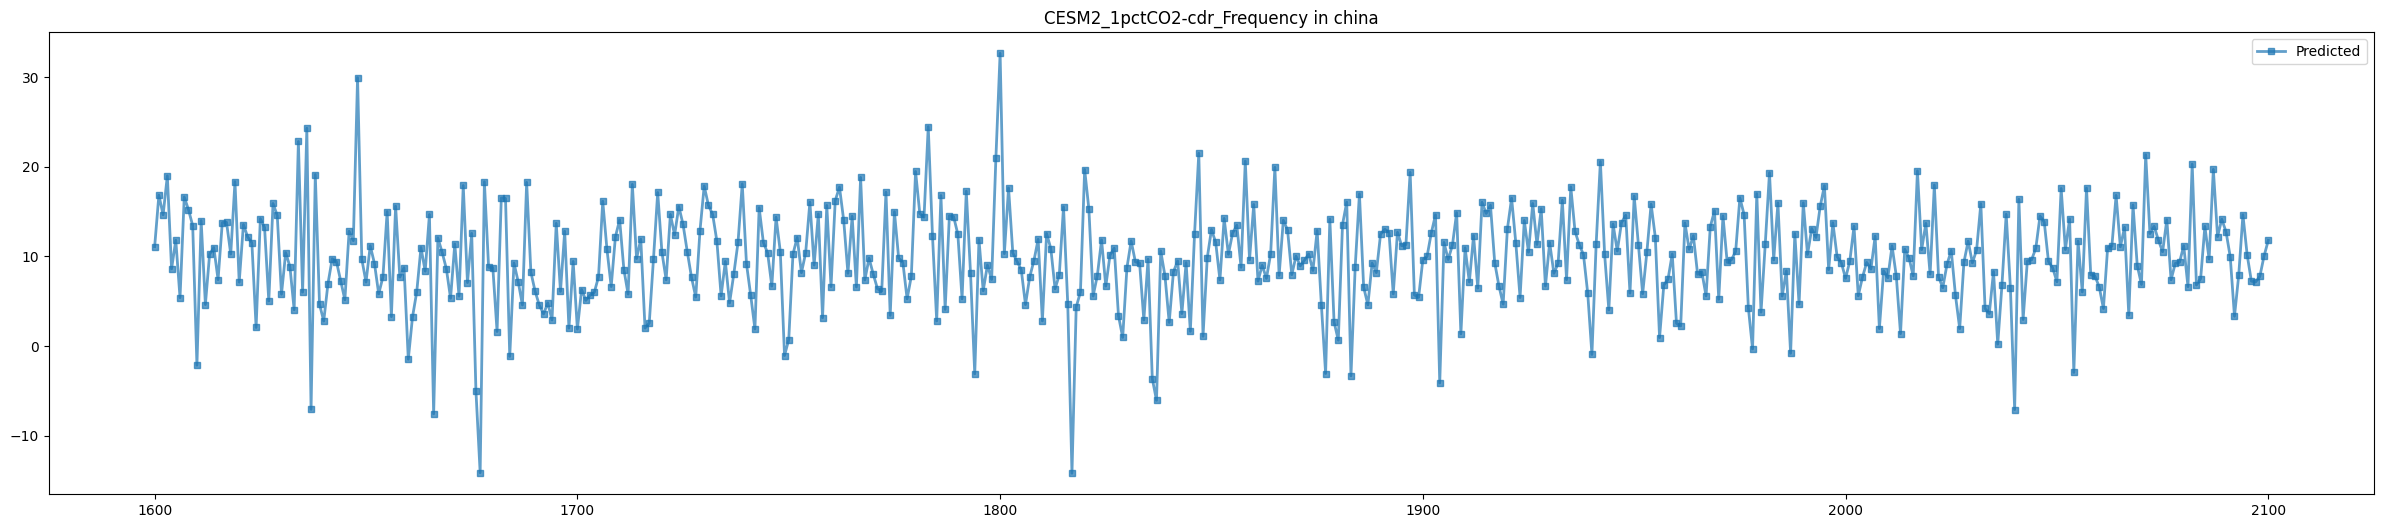

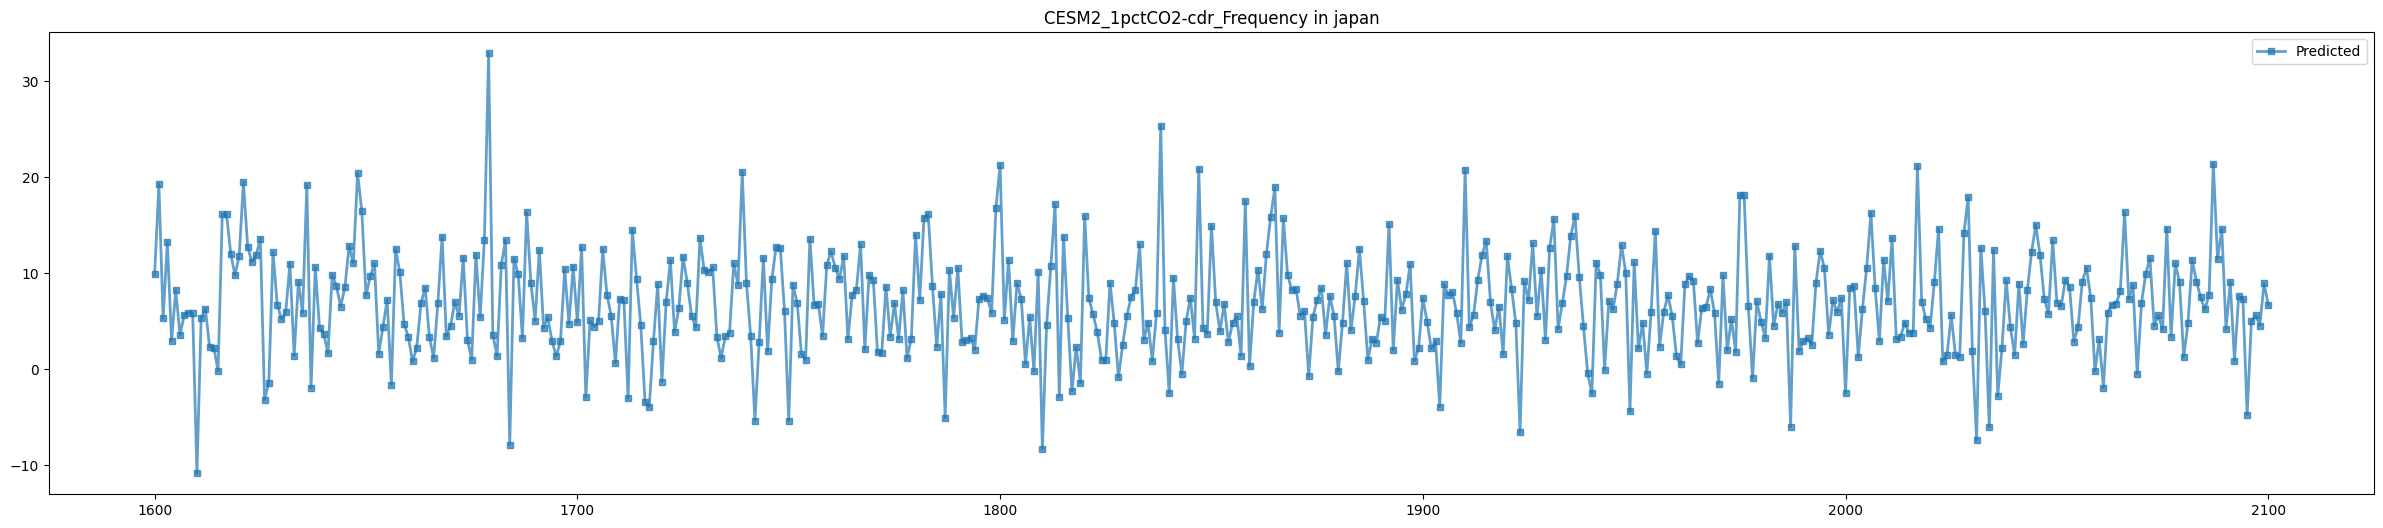

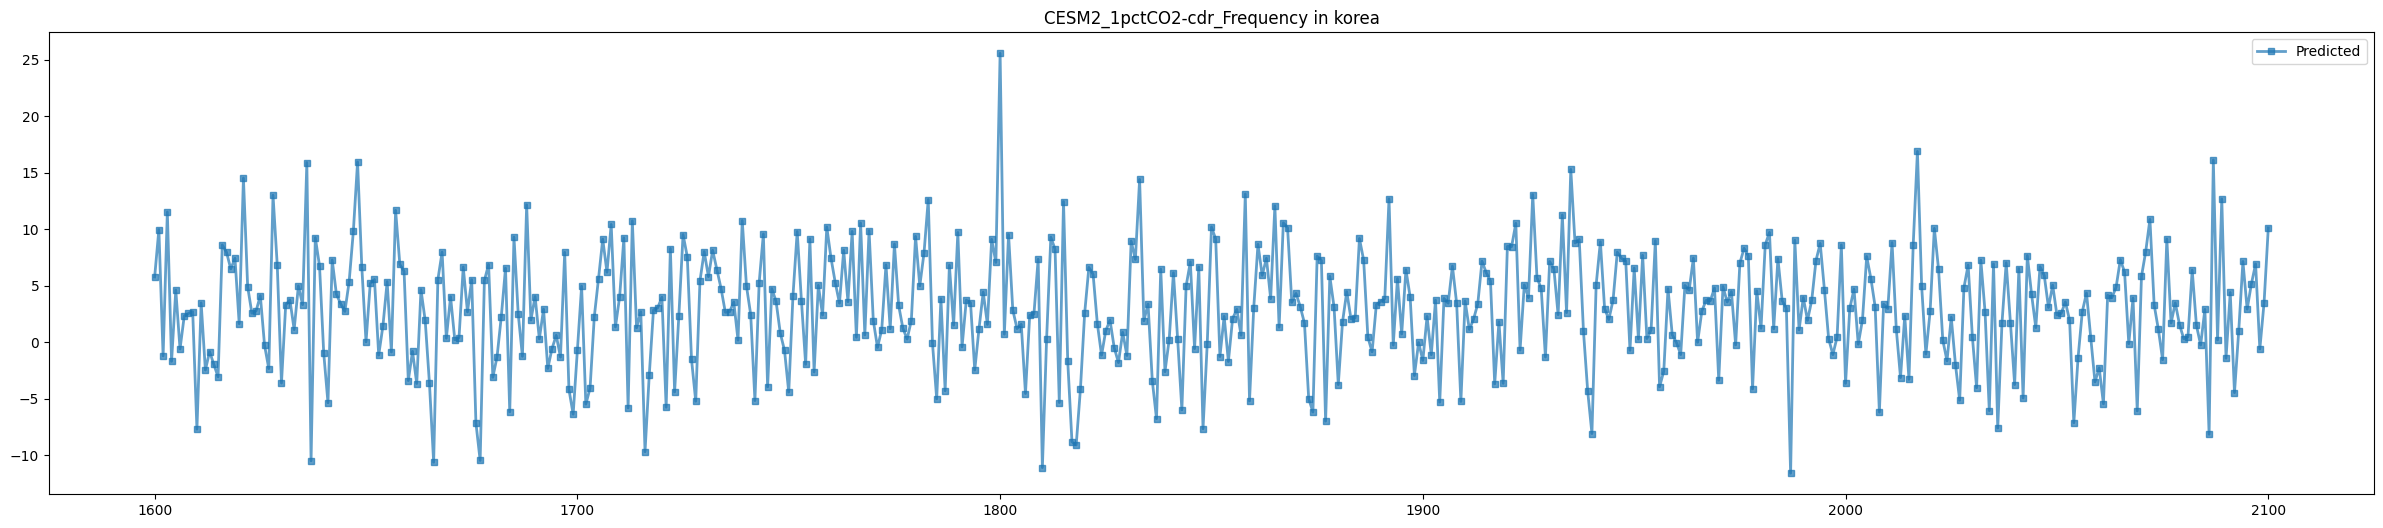

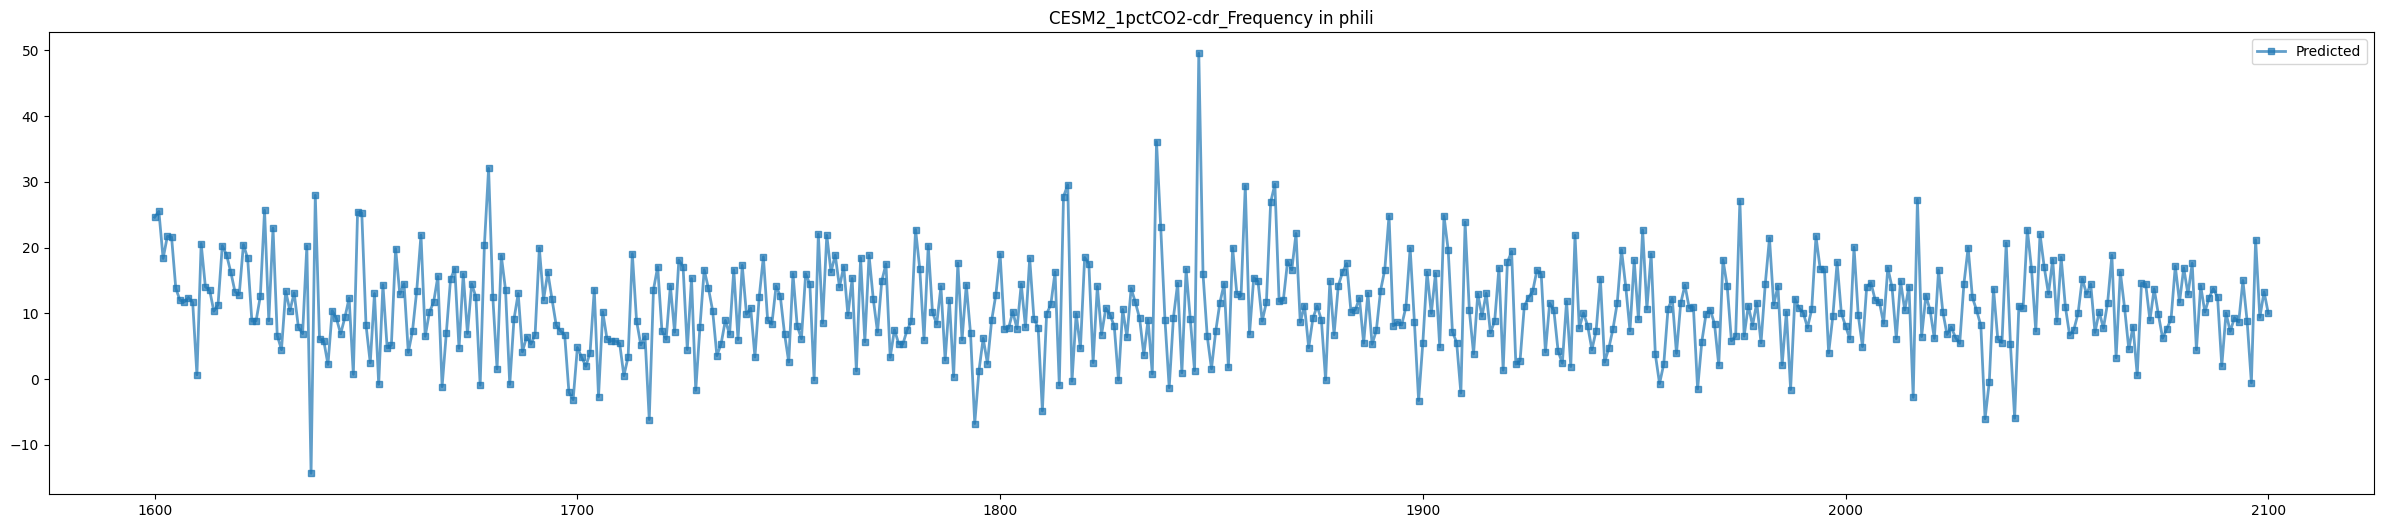

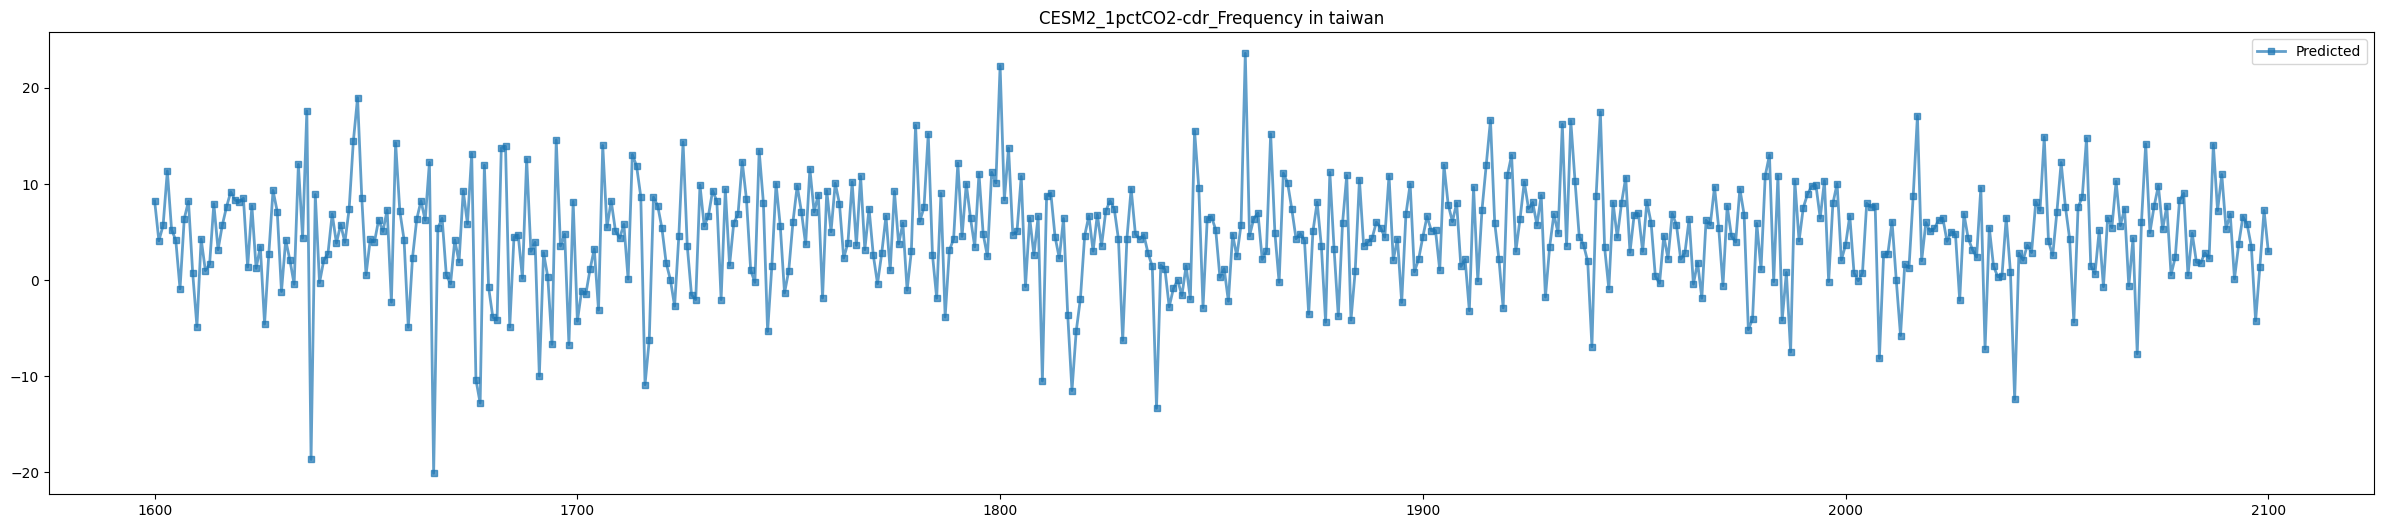

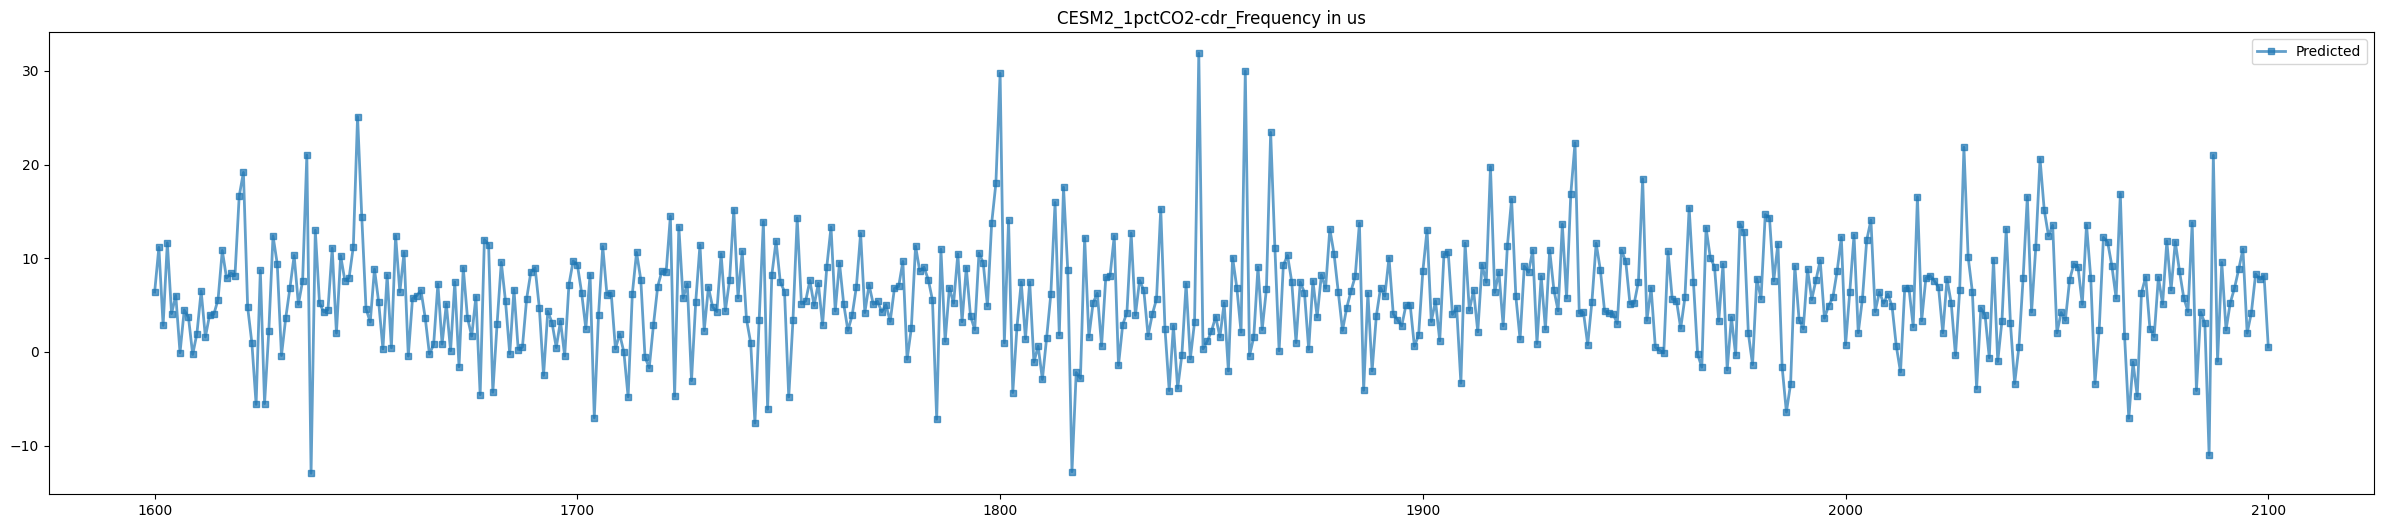

In [5]:
%cd /content/drive/My Drive/8.Colab Notebooks/2023.05.07 Final Prediction/result

# Load the predictions from the CSV file
y_pred_df = pd.read_csv('Freq_pred_ANN_PredicforNorESM2-LM_piControl.txt.csv')

# Plot the predictions and actual values for Inten by country and month
countries = y_pred_df['country'].unique()

for country in countries:
    country_pred_df = y_pred_df[y_pred_df['country'] == country]
    country_pred_df = country_pred_df.groupby('year').agg({'Freq_pred': 'sum'}).reset_index()
    plt.figure(figsize=(30, 6))
    plt.plot(country_pred_df['year'], country_pred_df['Freq_pred'], label="Predicted", linewidth=2, linestyle='-', marker='s', markersize=5, alpha=0.7)
    plt.title(f"CESM2_1pctCO2-cdr_Frequency in {country}")
    plt.legend()
    plt.show()


/content/drive/My Drive/8.Colab Notebooks/2023.05.07 Final Prediction/result


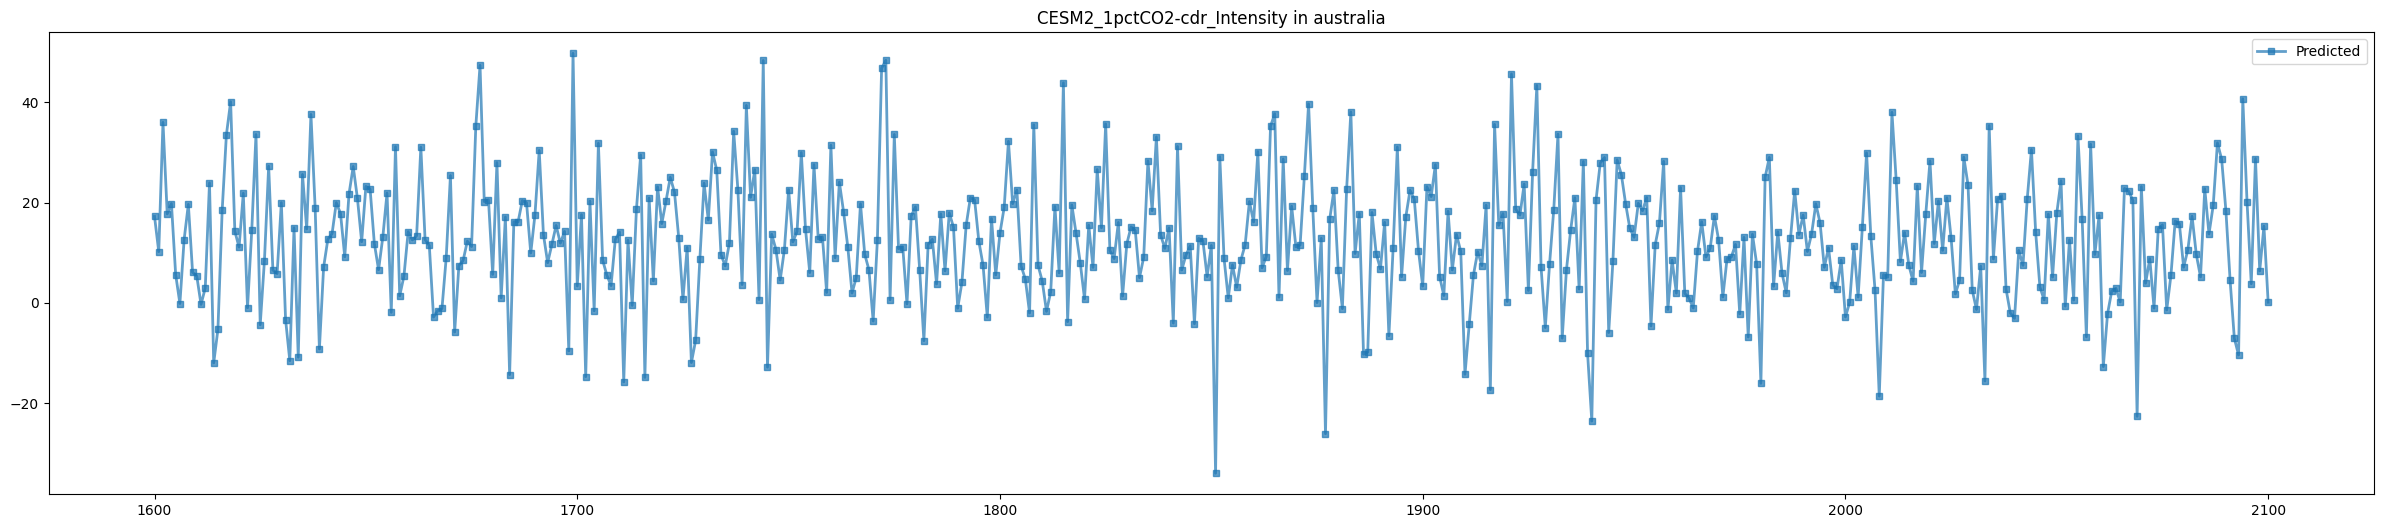

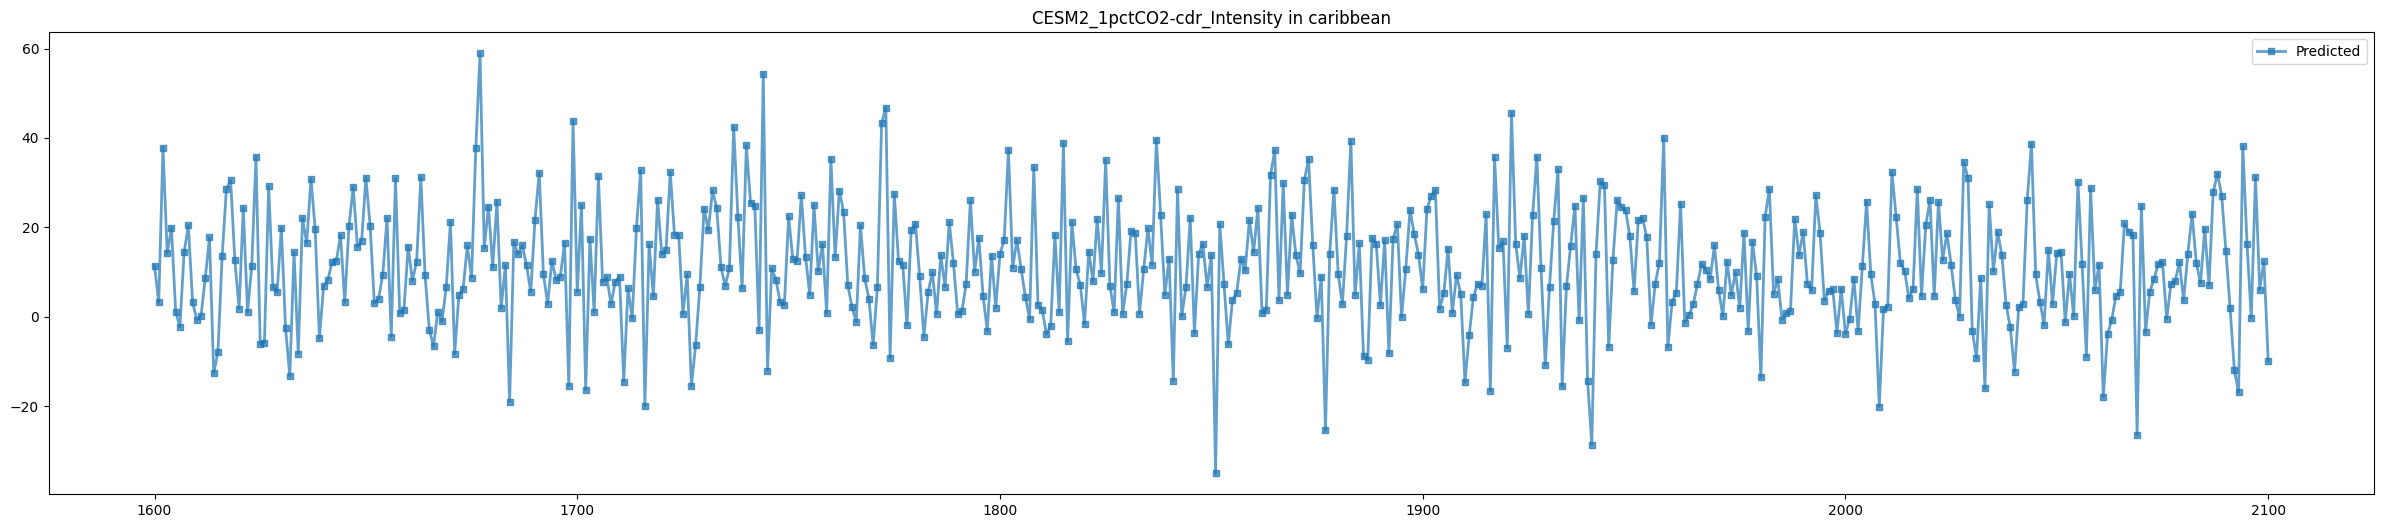

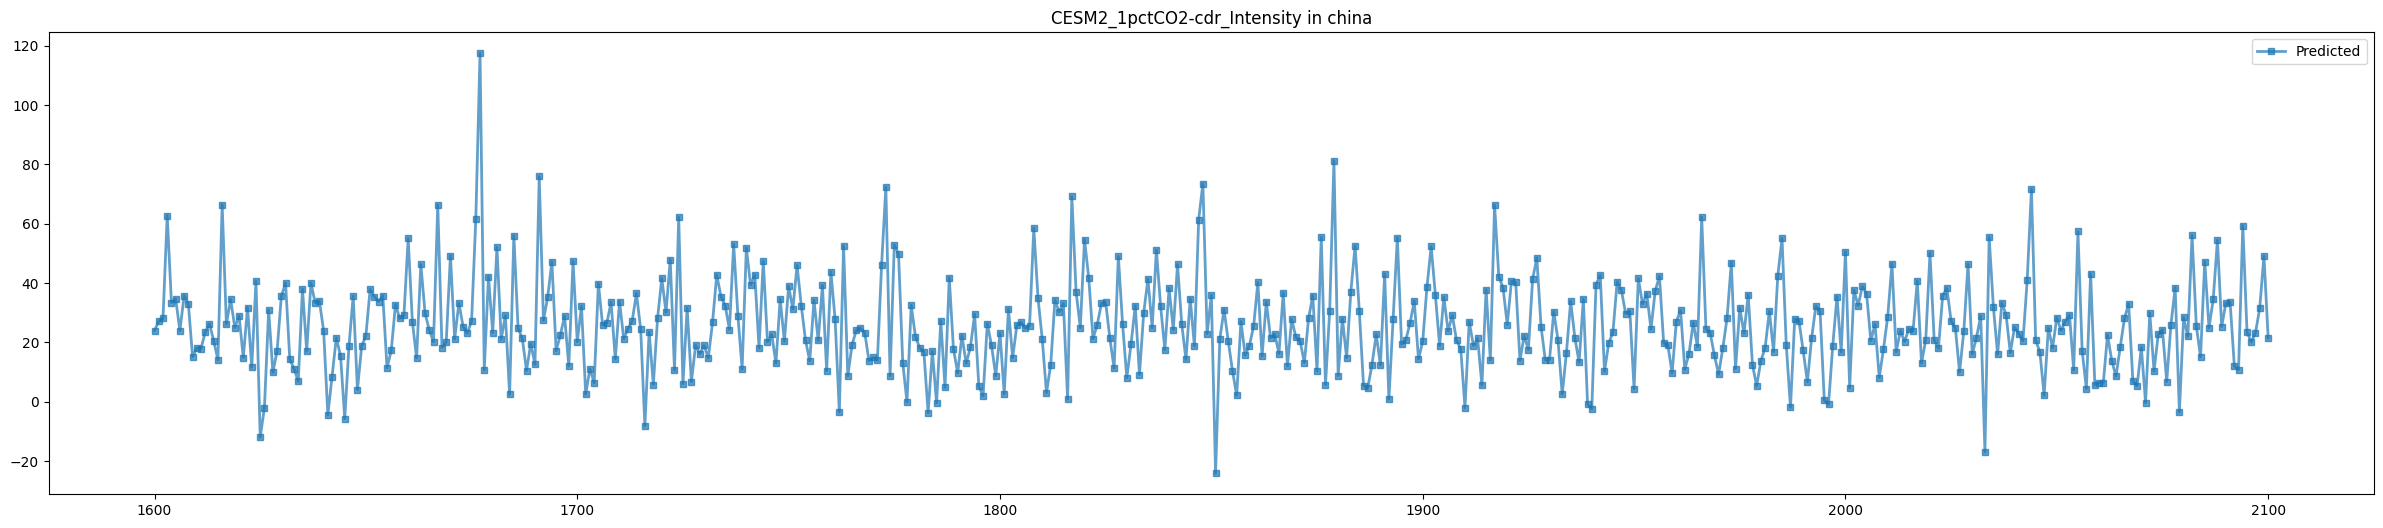

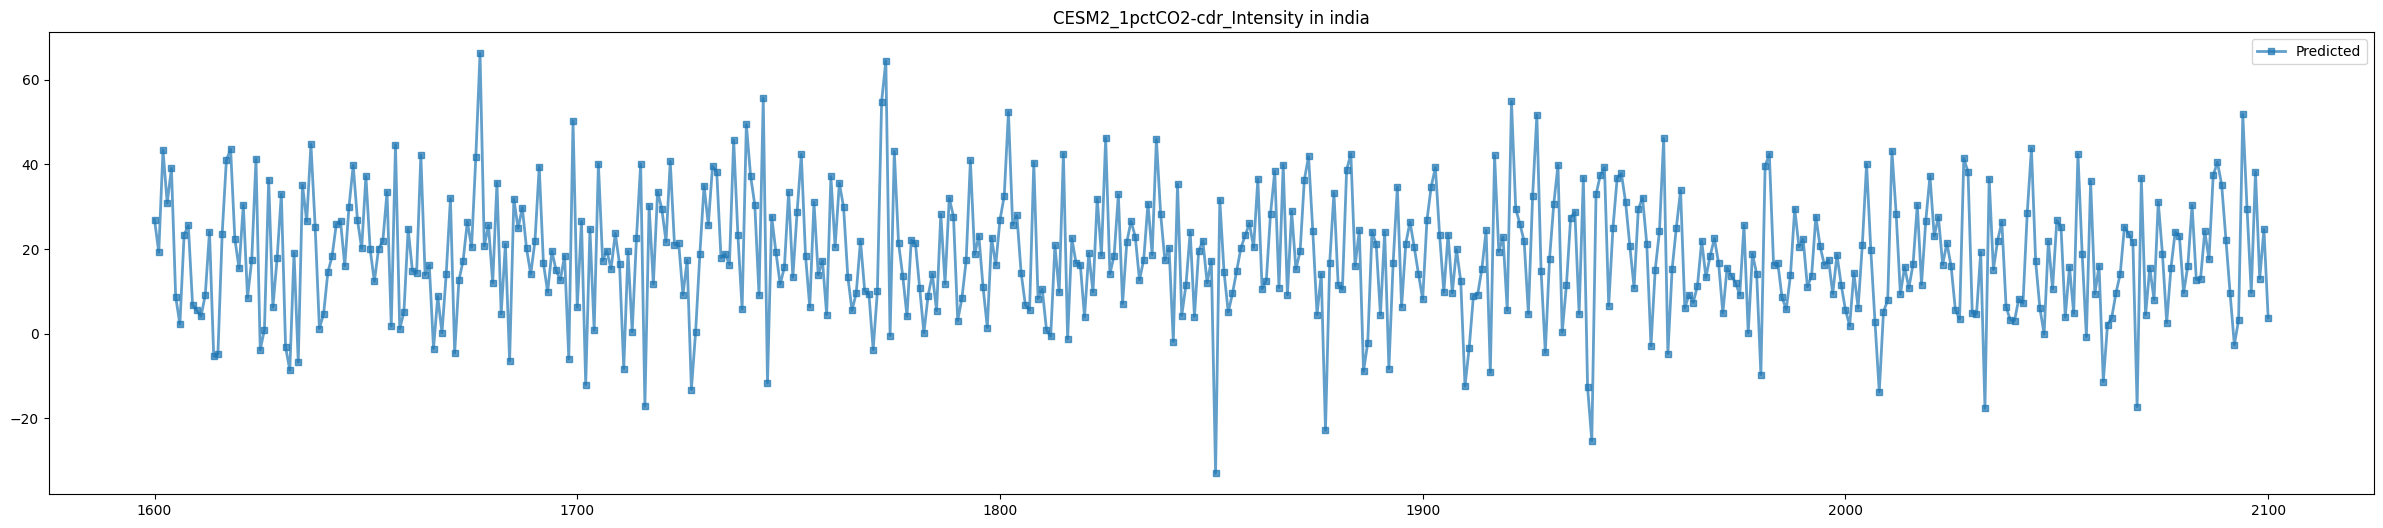

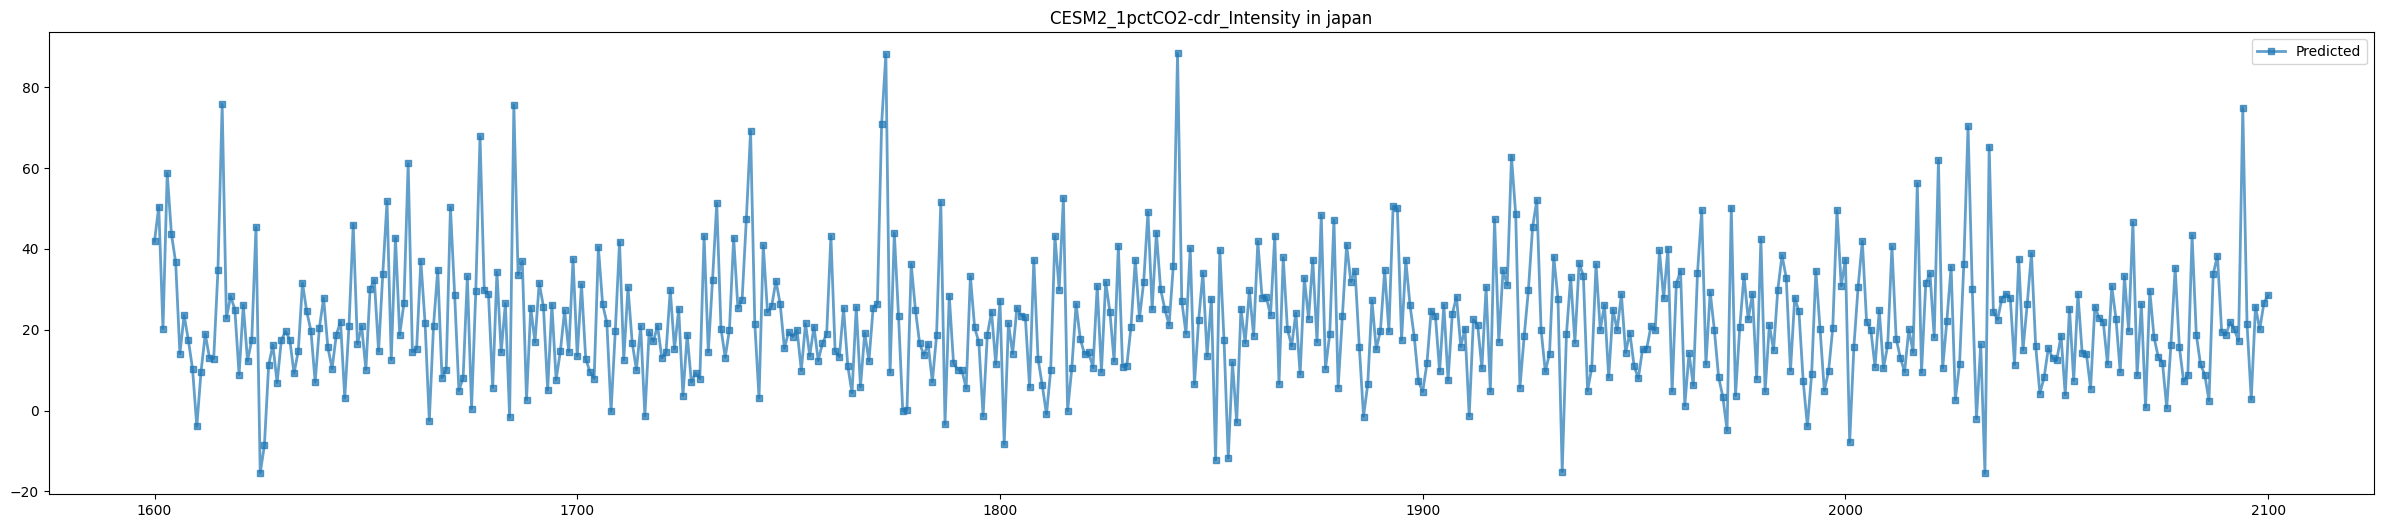

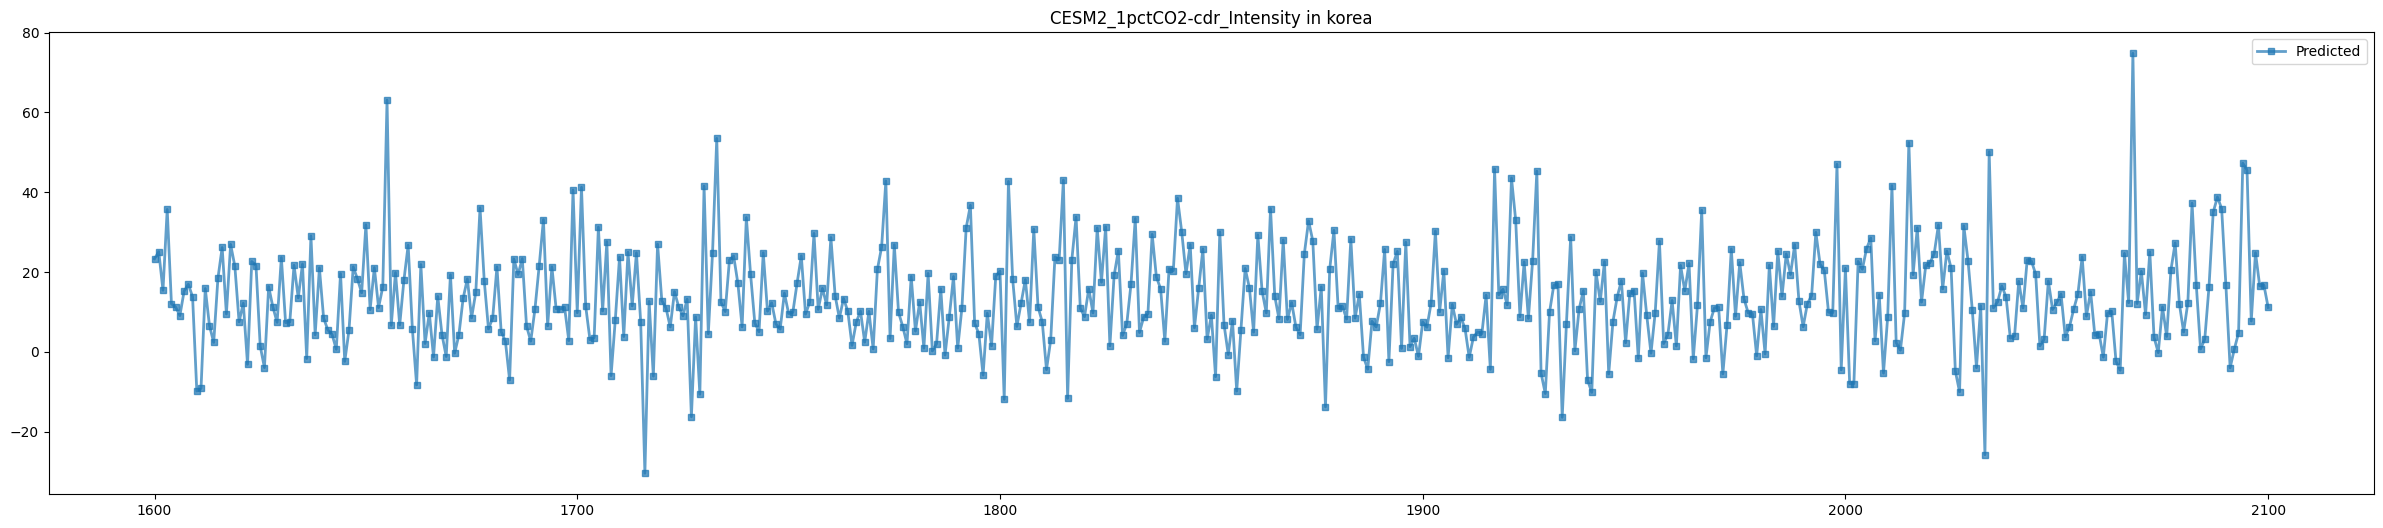

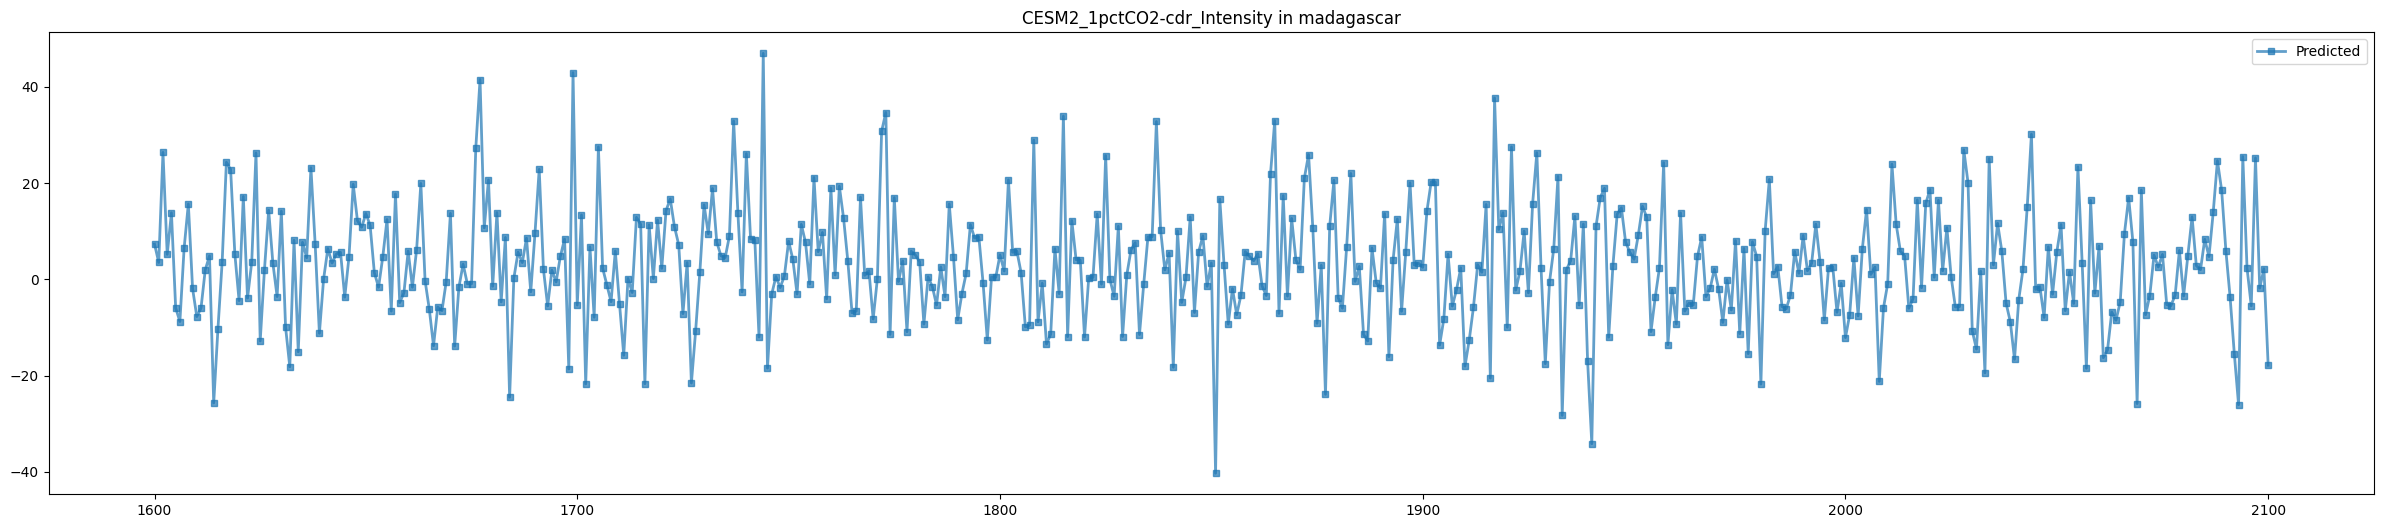

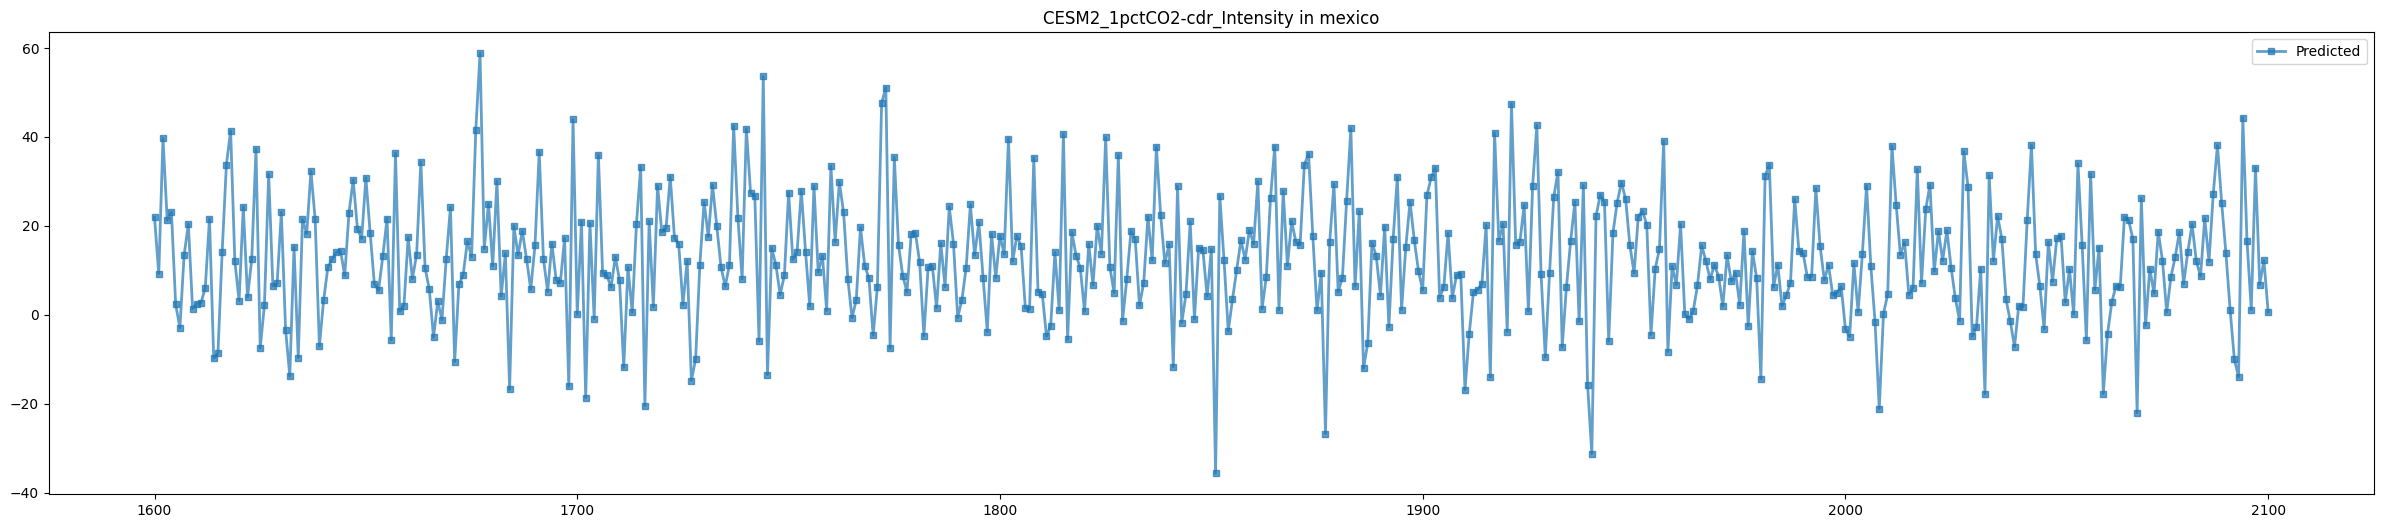

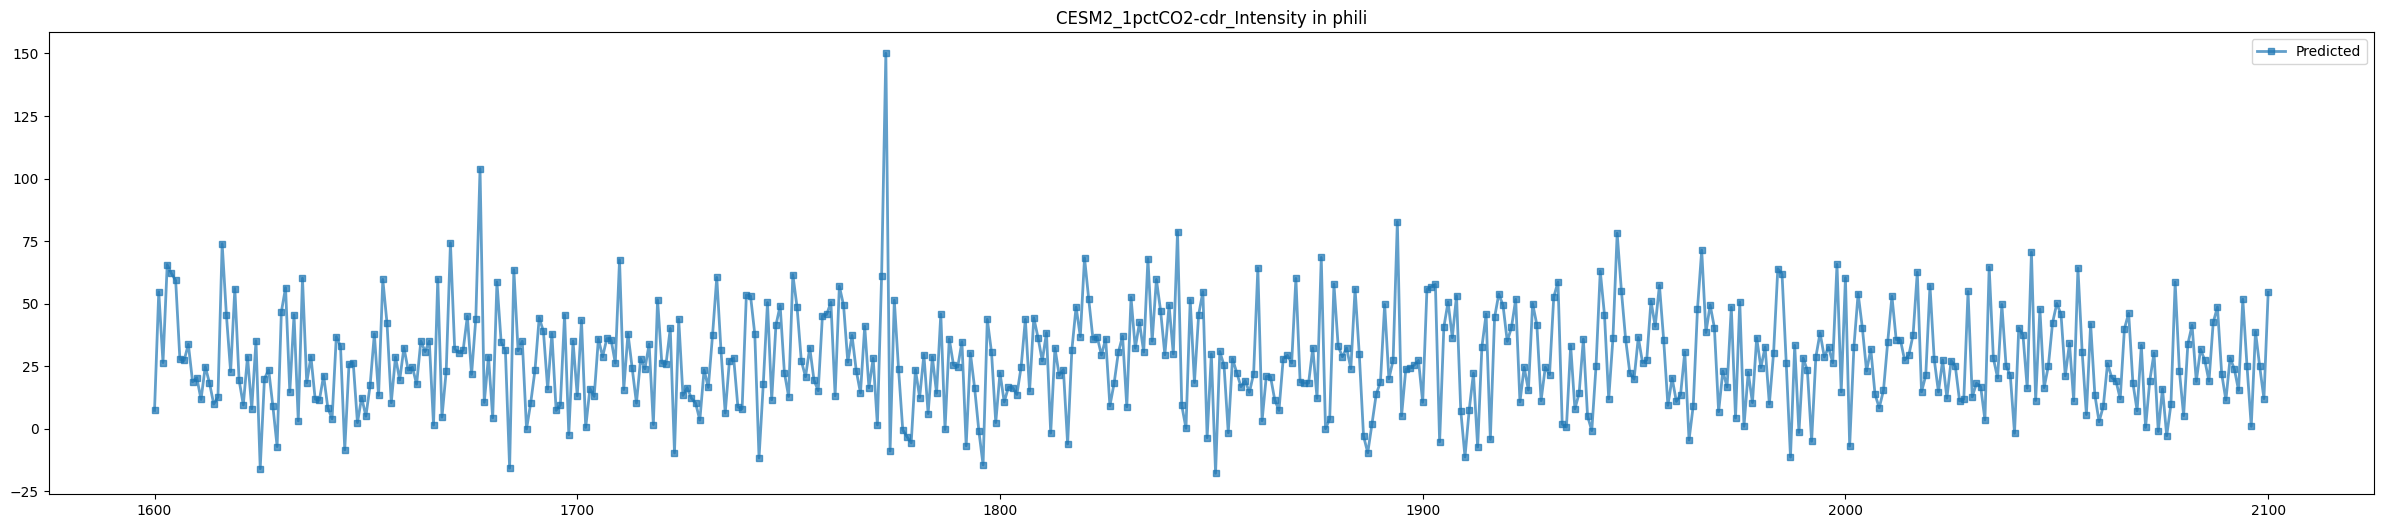

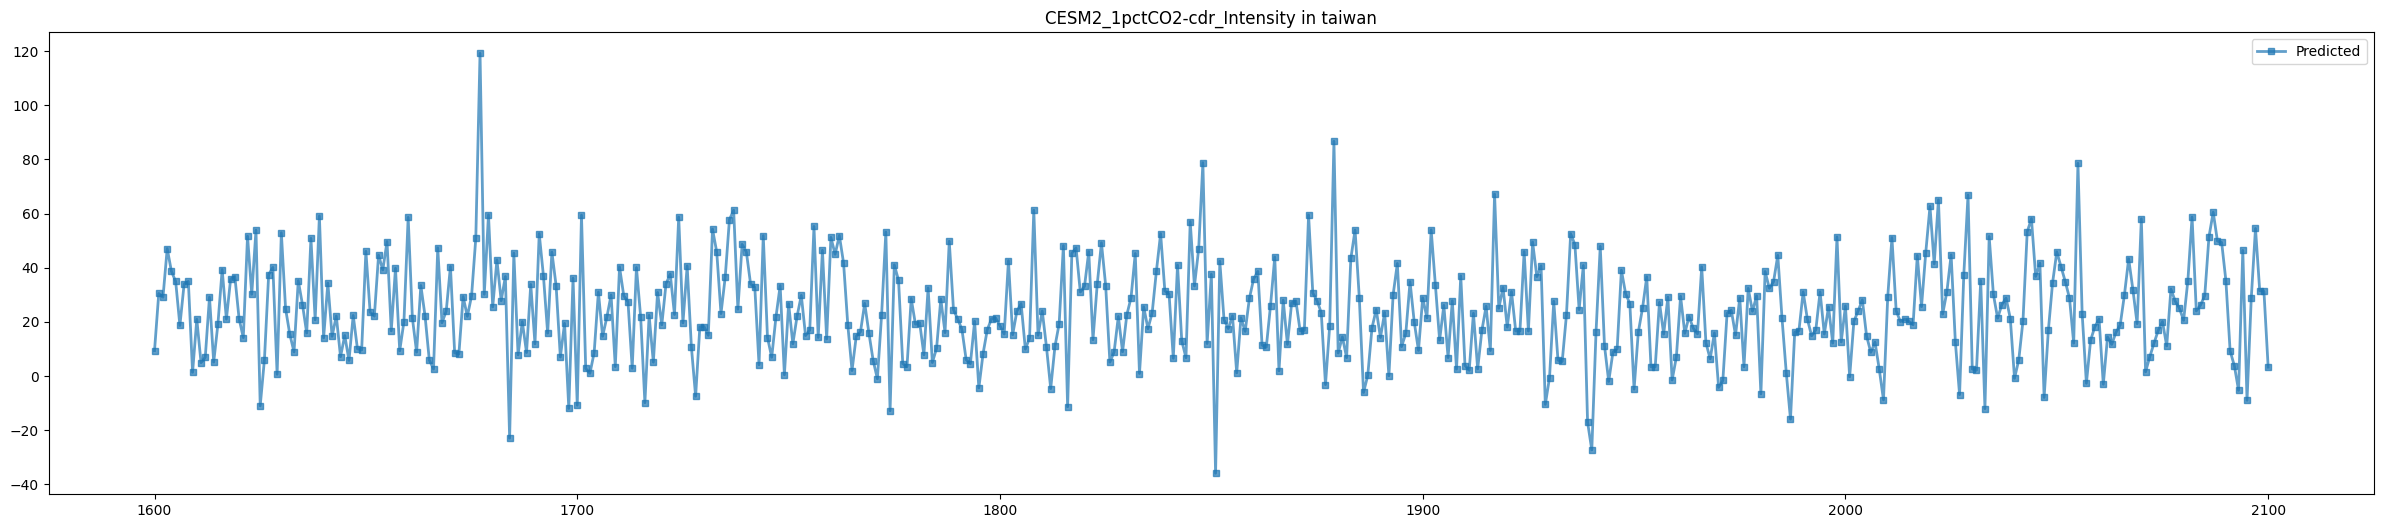

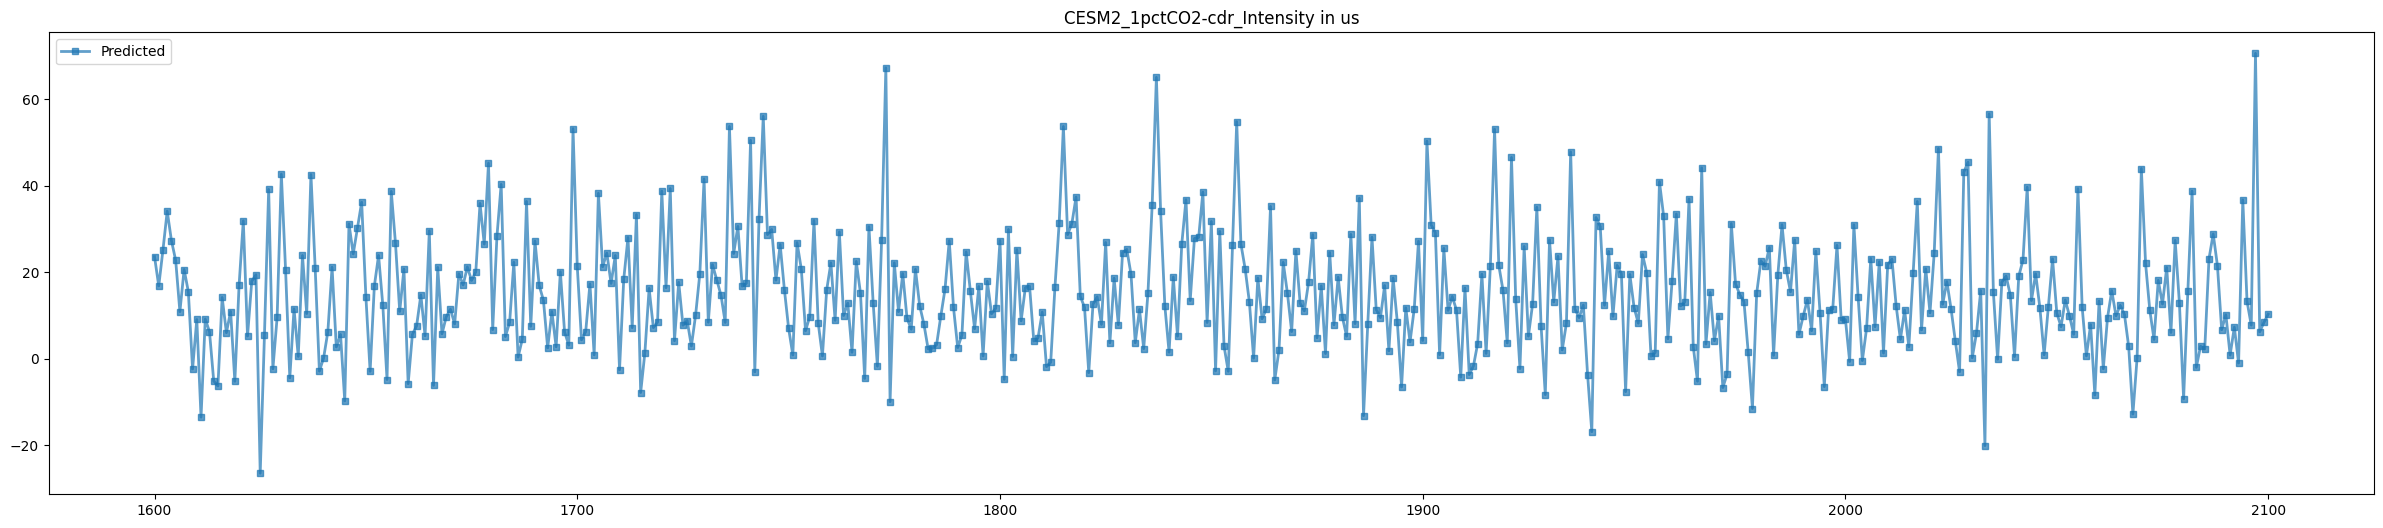

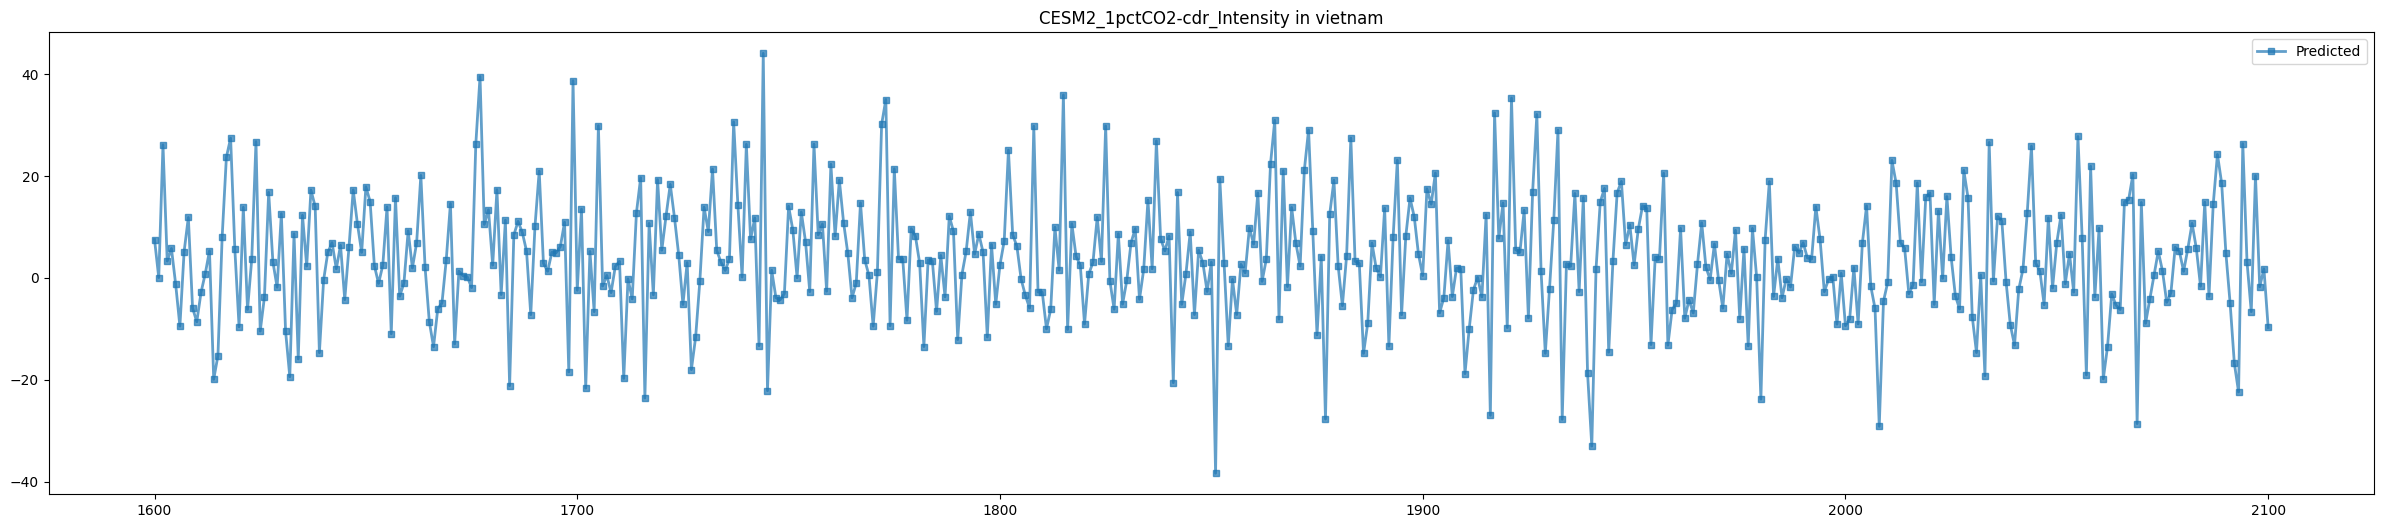

In [6]:
%cd /content/drive/My Drive/8.Colab Notebooks/2023.05.07 Final Prediction/result

# Load the predictions from the CSV file
y_pred_df = pd.read_csv('Inten_pred_ANN_PredicforNorESM2-LM_piControl.txt.csv')

# Plot the predictions and actual values for Inten by country and month
countries = y_pred_df['country'].unique()

for country in countries:
    country_pred_df = y_pred_df[y_pred_df['country'] == country]
    country_pred_df = country_pred_df.groupby('year').agg({'Inten_pred': 'mean'}).reset_index()
    plt.figure(figsize=(30, 6))
    plt.plot(country_pred_df['year'], country_pred_df['Inten_pred'], label="Predicted", linewidth=2, linestyle='-', marker='s', markersize=5, alpha=0.7)
    plt.title(f"CESM2_1pctCO2-cdr_Intensity in {country}")
    plt.legend()
    plt.show()
